##  *Statistics coded:* Causes of death statistics

Prepared by  [**Katharina Koehler**](@kkatha) (EMOS).

Objective of this notebook is illustrating the "Statistics Explained" article [Causes of death statisitics](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

## Configuration

Put all libraries/packages/modules/etc... that are necessary so that you can run this notebook.

In [1]:
#install.packages(c("ggplot2", "plotly", "tidyr", "repr", "dplyr", "devtools", "restatapi","gtsummary","eurostat","patchwork"))

In [4]:
install.packages("kableExtra")

also installing the dependency 'webshot'



package 'webshot' successfully unpacked and MD5 sums checked
package 'kableExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Katha\AppData\Local\Temp\RtmpiOof6K\downloaded_packages


In [5]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)
library(patchwork)
#library(restatapi)
library (eurostat)
library(gtsummary)
library(kableExtra)

Warning message:
"package 'kableExtra' was built under R version 3.6.3"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows



In [3]:
#assign("dmethod","curl",envir=.restatapi_env) 
#dataset <- get_eurostat_data(id="hlth_cd_asdr2",verbose=TRUE)
#head(dataset)

## Loading relevant datasets for analyses/ graphics

Pulling data from Eurostat API "https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=hlth_cd_asdr2&lang=en" id/ code used in function argument "hlth_cd_asdr2" and "hlth_cd_asdr" to identify dataset
- "hlth_cd_asdr2": Causes of death - standardised death rate by residence, 2011-2017 needed
- "hlth_cd_asdr": Causes of death - standardised death rate per 100 000 inhabitants - annual data, 2006-2010 needed

#### First step:
Define variables for relevant countries to make filtering easier later
#### Second Step
- Loading the complete dataset per bulk download via API -> Filtering the complete data set accordingly with R commands later
- dataset = years 2011-2017, dataset_2 = years 2006-2010
- change data format to keep only the year (done with substring command)

In [7]:
EU_27 <- c("AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
           "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE")
countries <- c("EU27_2020", "AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
               "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE","UK","IS","LI","NO","CH","RS","TR")

In [8]:
dataset <- get_eurostat(id="hlth_cd_asdr2")

Table hlth_cd_asdr2 cached at C:\Users\Katha\AppData\Local\Temp\RtmpiOof6K/eurostat/hlth_cd_asdr2_date_code_TF.rds


In [9]:
dataset$time <- as.integer(substr(dataset$time,1,4))
head(dataset)

unit,sex,age,icd10,geo,time,values
RT,F,TOTAL,A-R_V-Y,AT,2017,800.93
RT,F,TOTAL,A-R_V-Y,AT1,2017,839.44
RT,F,TOTAL,A-R_V-Y,AT11,2017,831.87
RT,F,TOTAL,A-R_V-Y,AT12,2017,844.03
RT,F,TOTAL,A-R_V-Y,AT13,2017,835.65
RT,F,TOTAL,A-R_V-Y,AT2,2017,785.24


In [6]:
dataset_2 <- get_eurostat(id="hlth_cd_asdr")

Table hlth_cd_asdr cached at C:\Users\Katha\AppData\Local\Temp\Rtmp44kabF/eurostat/hlth_cd_asdr_date_code_TF.rds


In [7]:
dataset_2 <- subset(dataset_2,dataset_2$time >= 2006)

In [8]:
dataset_2$time <- as.integer(substr(dataset_2$time,1,4))
head(dataset_2)

unit,sex,age,icd10,geo,time,values
RT,F,TOTAL,A-R_V-Y,AT,2010,820.2
RT,F,TOTAL,A-R_V-Y,BE,2010,845.7
RT,F,TOTAL,A-R_V-Y,BG,2010,1382.2
RT,F,TOTAL,A-R_V-Y,CH,2010,730.6
RT,F,TOTAL,A-R_V-Y,CY,2010,829.4
RT,F,TOTAL,A-R_V-Y,CZ,2010,1064.4


## Main findings

The code here will help reproducing the material presented in the section [Main findings](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

#### Creation of table: causes of death - standarized death rate, 2017
##### First steps: Filter data accordingly:
- only keep relevant countries
- create one values variable with values from 2017 and from 2016 where 2017 not available (for France and EU27 category)
- Keep only causes of death relevant for table, summarize

In [10]:
datatbl1 <- subset(dataset, dataset$sex=="T" &
                     dataset$age =="TOTAL" & 
                    dataset$geo %in% countries & 
                     (dataset$time==2017 | dataset$time==2016))
head(datatbl1)

unit,sex,age,icd10,geo,time,values
RT,T,TOTAL,A-R_V-Y,AT,2017,959.95
RT,T,TOTAL,A-R_V-Y,BE,2017,963.19
RT,T,TOTAL,A-R_V-Y,BG,2017,1631.13
RT,T,TOTAL,A-R_V-Y,CH,2017,823.77
RT,T,TOTAL,A-R_V-Y,CY,2017,1071.36
RT,T,TOTAL,A-R_V-Y,CZ,2017,1239.97


In [11]:
datatbl1$values_n <- ifelse(datatbl1$time==2017,datatbl1$values,NA)
datatbl1[datatbl1$geo=="FR",]$values_n <- datatbl1[datatbl1$geo=="FR",]$values
datatbl1[datatbl1$geo=="EU27_2020",]$values_n <- datatbl1[datatbl1$geo=="EU27_2020",]$values
datatbl1 <- datatbl1[!is.na(datatbl1$values_n),]

In [16]:
causes <- c("I","I20-I25","C","C33_C34","C18-C21","J","G_H","V_Y85","X60-X84_Y870","C50","C53","C54_C55")
datatbl1 <- datatbl1[datatbl1$icd10 %in% causes,]
#table(datatbl1$values_n,datatbl1$icd10)
#datatbl1$icd10
datatbl11 <- datatbl1[,c(4,5,8)]
tail(datatbl11)

icd10,geo,values_n
J,EU27_2020,74.91
J,FR,56.67
V_Y85,EU27_2020,6.03
V_Y85,FR,5.00
X60-X84_Y870,EU27_2020,10.75
X60-X84_Y870,FR,13.20


##### Second steps: Table
- change data frame format: create seperate variable for every disease each with respective values of death rate and each country as level
- create new dataset
- visualise table with kableExtra package

In [17]:
cd <- rep(0,35)
for(i in 1:datatbl11$geo){
    cd[i] <- datatbl11$values_n[datatbl11$icd10=="C" & datatbl11$geo==i]
}

Warning message in 1:datatbl11$geo:
"numerischer Ausdruck hat 420 Elemente: nur erstes wird genutzt"

ERROR: Error in cd[i] <- datatbl11$values_n[datatbl11$icd10 == "C" & datatbl11$geo == : Ersetzung hat Länge 0


## Developments between 2006 & 2016

The code here will help reproducing the material presented in the section [Developments between 2006 and 2010](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

##### First steps: 
- Merge two datasets to get data in the time interval 2006 - 2010
- Apply filters (same procedure for females and males)
    - Filter dataset with subset command (Male/ Female, age, only the summarising country level EU 27)
    - keep only relevant causes for the graphic (C=Cancer, C_33-C34= Lung cancer, C_50=Breast Cancer, G_H=Nervous system, 
        I20_I25=Ischaemic heart disease, V_Y85=Transport Accidents) & drop empty levels with droplevels command
    - check structure/ levels with str command

In [13]:
# Merge:
dataset_3 <- rbind(dataset,dataset_2) 
str(dataset_3)

Classes 'tbl_df', 'tbl' and 'data.frame':	2812203 obs. of  7 variables:
 $ unit  : Factor w/ 1 level "RT": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex   : Factor w/ 3 levels "F","M","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ age   : Factor w/ 3 levels "TOTAL","Y_GE65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 89 levels "A-R_V-Y","A15-A19_B90",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ geo   : Factor w/ 482 levels "AT","AT1","AT11",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time  : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ values: num  801 839 832 844 836 ...


##### *Filter Males*

In [14]:
##Graphic Males, 2006-2016, 100=2006
datagr1 <- subset(dataset_3, dataset_3$sex=="M" & dataset_3$age =="TOTAL" &
                     dataset_3$geo == "EU27_2020")
datagr1 <- subset(datagr1, datagr1$time >=2006)
#Keep only causes relevant for graphic
causes <- c("V_Y85","C","G_H","I20-I25","C33_C34")
datagr1 <- datagr1[datagr1$icd10 %in% causes,]
datagr1 <- droplevels(datagr1)
str(datagr1)

Classes 'tbl_df', 'tbl' and 'data.frame':	52 obs. of  7 variables:
 $ unit  : Factor w/ 1 level "RT": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex   : Factor w/ 1 level "M": 1 1 1 1 1 1 1 1 1 1 ...
 $ age   : Factor w/ 1 level "TOTAL": 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 5 levels "C","C33_C34",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ geo   : Factor w/ 1 level "EU27_2020": 1 1 1 1 1 1 1 1 1 1 ...
 $ time  : int  2016 2016 2016 2016 2016 2015 2015 2015 2015 2015 ...
 $ values: num  343.96 83.59 44.96 162.46 9.67 ...


##### *Filter Females*

In [15]:
##Graphic Females, 2006-2016, 100=2006
datagr2 <- subset(dataset_3, dataset_3$sex=="F" & dataset_3$age =="TOTAL" &
                     dataset_3$geo == "EU27_2020")
datagr2 <- subset(datagr2, datagr2$time >=2006)
#Keep only causes relevant for graphic
causes <- c("V_Y85","C","G_H","I20-I25","C33_C34","C50")
datagr2 <- datagr2[datagr2$icd10 %in% causes,]
datagr2 <- droplevels(datagr2)
str(datagr2)

Classes 'tbl_df', 'tbl' and 'data.frame':	63 obs. of  7 variables:
 $ unit  : Factor w/ 1 level "RT": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex   : Factor w/ 1 level "F": 1 1 1 1 1 1 1 1 1 1 ...
 $ age   : Factor w/ 1 level "TOTAL": 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 6 levels "C","C33_C34",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ geo   : Factor w/ 1 level "EU27_2020": 1 1 1 1 1 1 1 1 1 1 ...
 $ time  : int  2016 2016 2016 2016 2016 2016 2015 2015 2015 2015 ...
 $ values: num  196.2 29.5 32.7 36.6 88.1 ...


###### Second step: Standardize such that 2006 = 100
- same procedure for females and males
    - take values from year 2006 for each cause (2009 for lung cancer)
    - divide all other respective values with value from 2006/2009 divided by 100
    
###### *Males*

In [16]:
table(datagr1$icd10[datagr1$time==2006],datagr1$values[datagr1$time == 2006])

         
          16.3 36.5 226.9 387
  C          0    0     0   1
  C33_C34    0    0     0   0
  G_H        0    1     0   0
  I20-I25    0    0     1   0
  V_Y85      1    0     0   0

In [17]:
table(datagr1$icd10[datagr1$time==2009],datagr1$values[datagr1$time == 2009])

         
          13.5 37.6 94.7 201.2 372.9
  C          0    0    0     0     1
  C33_C34    0    0    1     0     0
  G_H        0    1    0     0     0
  I20-I25    0    0    0     1     0
  V_Y85      1    0    0     0     0

In [18]:
datagr1$values[datagr1$icd10=="C"] <- datagr1$values[datagr1$icd10=="C"] /3.87
datagr1$values[datagr1$icd10=="G_H"] <- datagr1$values[datagr1$icd10=="G_H"]/0.365
datagr1$values[datagr1$icd10=="I20-I25"] <- datagr1$values[datagr1$icd10=="I20-I25"]/2.269
datagr1$values[datagr1$icd10=="V_Y85"] <- datagr1$values[datagr1$icd10=="V_Y85"]/0.163
datagr1$values[datagr1$icd10=="C33_C34"] <- datagr1$values[datagr1$icd10=="C33_C34"]/0.947

###### *Females*

In [19]:
table(datagr2$icd10[datagr2$time==2006],datagr2$values[datagr2$time == 2006])

         
          4.6 29.1 35.1 133.8 206.7
  C         0    0    0     0     1
  C33_C34   0    0    0     0     0
  C50       0    0    1     0     0
  G_H       0    1    0     0     0
  I20-I25   0    0    0     1     0
  V_Y85     1    0    0     0     0

In [20]:
table(datagr2$icd10[datagr2$time==2009],datagr2$values[datagr2$time == 2009])

         
          3.8 25.6 31 33.8 117.5 202.2
  C         0    0  0    0     0     1
  C33_C34   0    1  0    0     0     0
  C50       0    0  0    1     0     0
  G_H       0    0  1    0     0     0
  I20-I25   0    0  0    0     1     0
  V_Y85     1    0  0    0     0     0

In [21]:
datagr2$values[datagr2$icd10=="C"] <- datagr2$values[datagr2$icd10=="C"] /2.067
datagr2$values[datagr2$icd10=="C50"] <- datagr2$values[datagr2$icd10=="C50"] /0.351
datagr2$values[datagr2$icd10=="G_H"] <- datagr2$values[datagr2$icd10=="G_H"]/0.291
datagr2$values[datagr2$icd10=="I20-I25"] <- datagr2$values[datagr2$icd10=="I20-I25"]/1.338
datagr2$values[datagr2$icd10=="V_Y85"] <- datagr2$values[datagr2$icd10=="V_Y85"]/0.046
datagr2$values[datagr2$icd10=="C33_C34"] <- datagr2$values[datagr2$icd10=="C33_C34"]/0.256

##### Third step: Create graphic with ggplot2 package
- using the package ggplot to create the line plot for males and females (+ connects the different subcommands for the graphic)
- creating the space with aes (variables on x and y axis, grouped by icd10 - causes of death)
- adding the lines for the different causes of death with geom_line, different colors for each cause and with linewidth 1
- adding a horizontal line for the start value (of the rate) 100 of 2006, in black, linetype two (dashed) 
- creating the title with subtitle
- setting the values for the y and x axis 
- changing the overall theme to "classic" (white background)
- definining the legend position
- filling the legend manually with icd10 definitions and colors (token from the original graphic with hex code)
- deleting labeling of axes
- changing the size of title and subtitle


###### *Males*

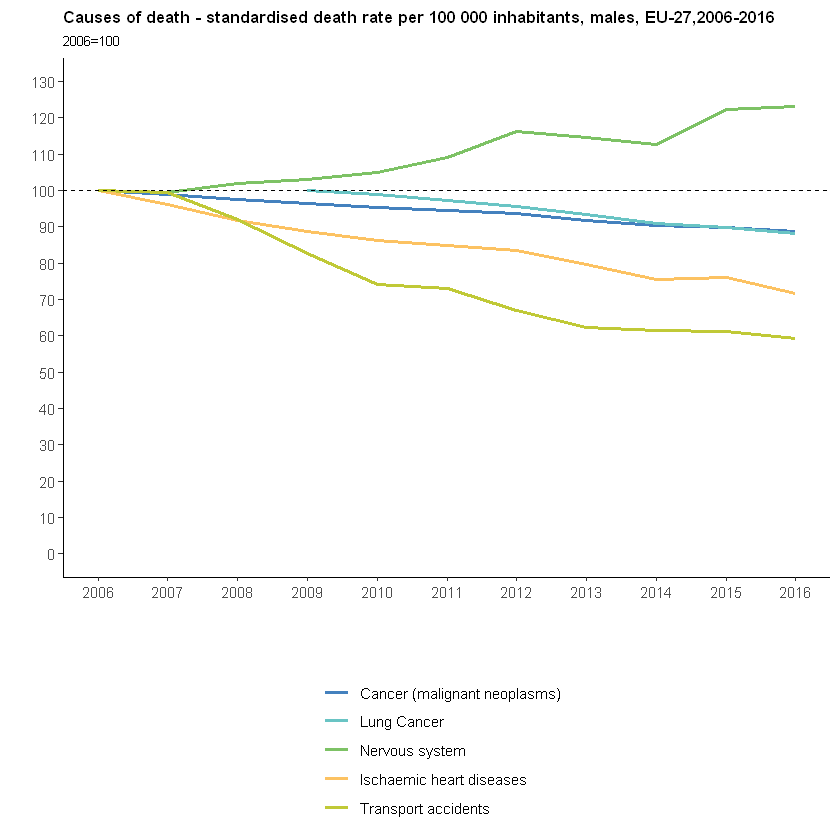

In [22]:
figure1 <- ggplot(datagr1, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10),lwd=1) + 
    geom_hline(yintercept=100,lty=2) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants, males, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)", "Lung Cancer", "Nervous system","Ischaemic heart diseases",
                                 "Transport accidents"), 
            values = c("#4481be","#69c4c4","#7dc265","#fcc262","#c0c937"),name = " ") +
    ylab(" ")+
    xlab(" ")

figure1 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)

##### *Females*

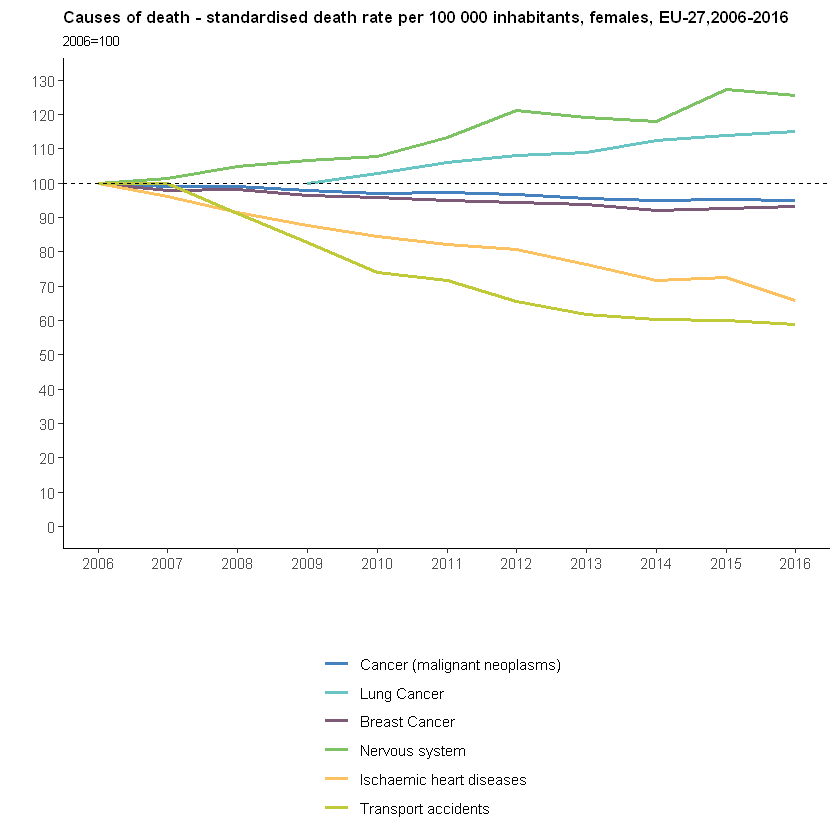

In [23]:
figure2 <- ggplot(datagr2, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10),lwd=1) + 
    geom_hline(yintercept=100,lty=2) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants, females, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)", "Lung Cancer", "Breast Cancer",
                                  "Nervous system","Ischaemic heart diseases",
                                 "Transport accidents"), 
    values = c("#4481be","#69c4c4","#7d5b78","#7dc265","#fcc262","#c0c937"), name = " ") +
    ylab(" ")+
    xlab(" ")

figure2 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)

## Causes of death by sex
The code here will help reproducing the material presented in the section [Causes of death by sex](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).
 
### Figure 3: Causes of death - standardised death rate, EU-27,2016
##### First steps: Apply relevant filters
- define variable with causes of death relevant for the graphic
- keeping only observations of year 2016, EU27_2020, age in total
- deleting unused variables & levels from dataset (age, unit, time, geo)
- checking structure/ values of ordered dataset (do they match to the graphic) 

In [24]:
causes2 <- c("I20-I25", #Ischaemic heart diseases
            "I60-I69", #Cerebrovascular diseases
            "C33_C34", #Mallignant neoplasms of trachea, broncus and lung
            "J40-J47", #Chronic lower respiratory diseases
             "ACC", #Accidents
            "C18-C21", #Malignant neoplasms of colon, rectosigmoid junction, rectum, anus and anal canal
            "J12-J18", #Pneumonia
            "E10-E14", #Diabetes mellitus
            "C25", #Malignant neoplasms of pancreas
            "C50", #Malignant neoplasms of breast
            "N00-N29", #Diseases of kidney and ureter
            "K70_K73_K74", #Chronic liver disease
            "C16", #Malignant neoplasms of stomach
            "X60-X84_Y870", #Intentional self harm
            "F10", #Mental and behavioural disorders due to use of alcohol
            "B20-B24", #HIV
             "TOXICO") #Drug dependence

In [25]:
data_fig3 <- subset(dataset, dataset$time==2016  & 
                      dataset$geo=="EU27_2020" &
                    dataset$icd10 %in% causes2 &
                   dataset$age=="TOTAL")
data_fig3 <- droplevels(data_fig3)
data_fig3 <- data_fig3[,-c(1,3,5,6)]
str(data_fig3)

Classes 'tbl_df', 'tbl' and 'data.frame':	51 obs. of  3 variables:
 $ sex   : Factor w/ 3 levels "F","M","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 17 levels "ACC","B20-B24",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ values: num  21.81 0.27 7.67 23.21 15.04 ...


In [26]:
head(data_fig3[order(data_fig3$values,decreasing = T),],20)

sex,icd10,values
M,I20-I25,162.46
T,I20-I25,119.44
M,I60-I69,90.33
F,I20-I25,88.08
M,C33_C34,83.59
T,I60-I69,81.68
F,I60-I69,74.44
T,C33_C34,52.86
M,J40-J47,47.42
M,ACC,45.48


##### Second step: Modify dataset
- changing the order within the dataset to get the ranked structure
- ranking on the average values of males and females (deleting total of sex) & releveling of the variable icd10 according to ranks
- dividing dataset into two parts to be able to visualise two different scales

In [27]:
data_fig3 <- subset(data_fig3, data_fig3$sex!="T")
data_fig3 <- data_fig3[order(data_fig3$values,decreasing=TRUE),]
rank_icd <- aggregate(data_fig3$values,by=list(data_fig3$icd10),mean)
(rank_icd <- rank_icd[order(rank_icd$x,decreasing=TRUE),])

,Group.1,x
10,I20-I25,125.270
11,I60-I69,82.385
6,C33_C34,56.535
13,J40-J47,34.195
1,ACC,33.645
4,C18-C21,32.220
12,J12-J18,24.320
8,E10-E14,24.025
5,C25,17.595
7,C50,16.620


In [28]:
head(data_fig3)

sex,icd10,values
M,I20-I25,162.46
M,I60-I69,90.33
F,I20-I25,88.08
M,C33_C34,83.59
F,I60-I69,74.44
M,J40-J47,47.42


In [29]:
data_fig31 <- subset(data_fig3, (data_fig3$icd10=="I20-I25" | data_fig3$icd10=="I60-I69" | data_fig3$icd10=="C33_C34"))
data_fig32 <- subset(data_fig3, (data_fig3$icd10!="I20-I25" & data_fig3$icd10!="I60-I69" & data_fig3$icd10!="C33_C34"))

###### Third step: Create graphic with ggplot2 and patchwork package
- using the package ggplot to create the combined bar plot for males and females
- creating two seperate barplots (considering the two different scales of y axis) and combining them as last step using the patchwork package: fig1 / fig2
- creating the space with aes (causes of death on x axis and values on y axis)
- creating the bar plot with geom_bar command, grouped by sex (fill=sex) with bar beside bar (position="dodge"), barwidth
- changing x and y axis with coord_flip () to get horizontal bars
- setting the values & labels for the axes (with position="right", the y-axis is set to be above the graphic)
- deleting the legend for the first graphic as it is only needed once (see second ggplot command, there the legend position is specified)
- creating the legend and colors for the bars with scale_fill_manual with sex (colors token from the original with hex code)
- deleting labels of the axes
- creating the title with subtitle
- changing the size of title and subtitle, axis labels

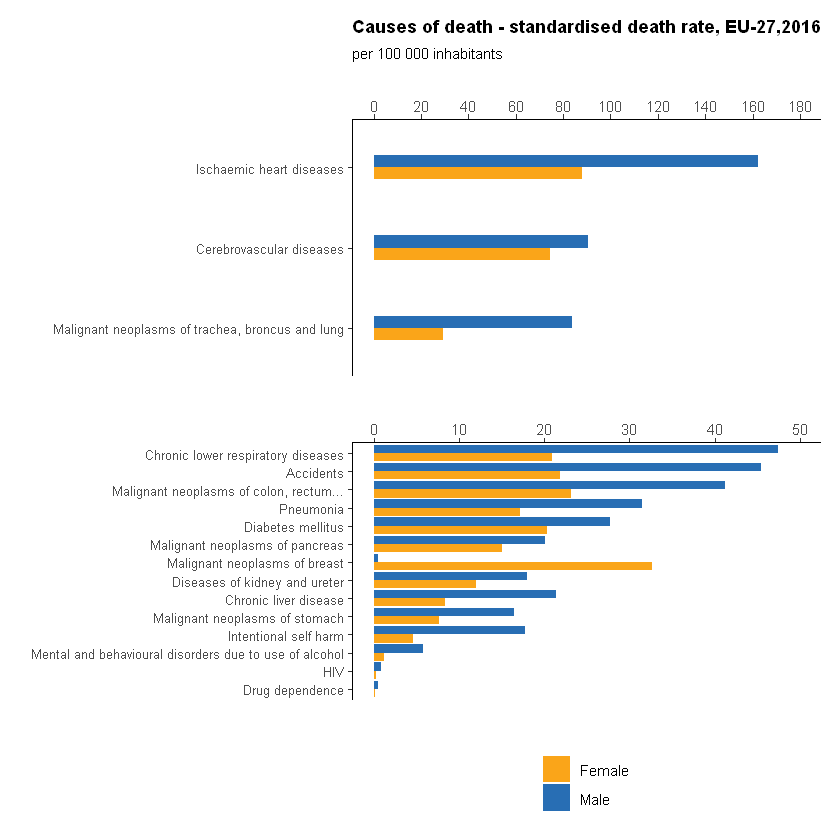

In [30]:
fig31<- ggplot(data_fig31, aes(x=icd10,y=values)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge",width=0.3) +
            coord_flip()+
            theme_classic()+
            scale_x_discrete(limits=c("C33_C34","I60-I69","I20-I25") ,
                             labels=c("Malignant neoplasms of trachea, broncus and lung",
                                    "Cerebrovascular diseases","Ischaemic heart diseases")) +
            scale_y_continuous(position = "right",limits = c(0, 180), breaks = seq(0, 180, by = 20))+
        theme(legend.position="none")+
        scale_fill_manual(labels=c("Female","Male"),values = c("#faa519","#286eb4"), name = " ")+
        ylab(" ")+
        xlab(" ")+
        ggtitle("Causes of death - standardised death rate, EU-27,2016",subtitle="per 100 000 inhabitants")+
        theme(axis.text.y=element_text(size=8), plot.title = element_text(size = 11, face = "bold"),
          plot.subtitle = element_text(size=9),legend.title=element_blank())
fig32 <- ggplot(data_fig32, aes(x=icd10,y=values)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge") +
            coord_flip()+
             theme_classic()+
            scale_x_discrete(limits=c("TOXICO","B20-B24","F10","X60-X84_Y870","C16","K70_K73_K74","N00-N29","C50","C25",
                                              "E10-E14","J12-J18","C18-C21","ACC","J40-J47") ,
                             labels=c("Drug dependence","HIV","Mental and behavioural disorders due to use of alcohol",
                                     "Intentional self harm","Malignant neoplasms of stomach","Chronic liver disease",
                                     "Diseases of kidney and ureter","Malignant neoplasms of breast",
                                      "Malignant neoplasms of pancreas",
                                     "Diabetes mellitus","Pneumonia",
                                      "Malignant neoplasms of colon, rectum...",
                                     "Accidents","Chronic lower respiratory diseases")) +
            scale_y_continuous(position = "right",limits = c(0, 50), breaks = seq(0, 50, by = 10))+
        theme(legend.position="bottom",legend.direction="vertical") +
        scale_fill_manual(labels=c("Female","Male"),values = c("#faa519","#286eb4"), name = " ") +
        ylab(" ")+
        xlab(" ")+
        theme(axis.text.y=element_text(size=8))
fig31 / fig32

### Figure 4: Deaths from ischaemic heart diseases - standardized death rate, 2017
##### First steps: Apply relevant filters
- keeping variable with causes of death relevant for the graphic (ischaemic heart diseases = I20-I25)
- keeping only observations of countries specified in countries variable at the beginning, age in total
- using the values for year 2017 (for EU27 and France from 2016), creating new values_n variable
- deleting unused variables & levels from dataset (age, unit, time,icd-10, old values variable)
- checking structure/ values of ordered dataset (do they match to the graphic)

In [31]:
data_fig4 <- subset(dataset, (dataset$time==2016 | dataset$time==2017)  & 
                    dataset$geo %in% countries &
                    dataset$icd10=="I20-I25" &
                   dataset$age=="TOTAL")
data_fig4 <- droplevels(data_fig4)
data_fig4$values_n <- ifelse(data_fig4$time==2017,data_fig4$values,NA)
data_fig4[data_fig4$geo=="FR",]$values_n <- data_fig4[data_fig4$geo=="FR",]$values
data_fig4[data_fig4$geo=="EU27_2020",]$values_n <- data_fig4[data_fig4$geo=="EU27_2020",]$values
data_fig4 <- data_fig4[!is.na(data_fig4$values_n),]
data_fig4 <- data_fig4[,-c(1,3,4,6,7)]
#str(data_fig4)
tail(data_fig4)

sex,geo,values_n
F,EU27_2020,88.08
F,FR,28.01
M,EU27_2020,162.46
M,FR,73.64
T,EU27_2020,119.44
T,FR,46.61


##### Second step: Modify dataset
- changing the order within the dataset to get the ranked structure
- ranking on the combined values of males and females (using total of sex) & releveling of the variable icd10 according to ranks & structure in original data set)
    - EU 27, summarizing category
    - EU member countries
    - additional members of Schengen area
    - candidate countries Serbia and Turkey

In [32]:
#(subset(data_fig4,data_fig4$geo == "EU27_2020"))

In [33]:
#data_fig42 <- subset(data_fig4,data_fig4$geo %in% EU_27 & data_fig4$sex=="T")
#data_fig42[order(data_fig42$values_n,decreasing=TRUE),]

In [34]:
#data_fig43 <- subset(data_fig4,(data_fig4$geo == "IS" | 
          #                      data_fig4$geo == "CH" |
           #                    data_fig4$geo == "NO" |
           #                     data_fig4$geo == "LI") 
            #         & data_fig4$sex=="T")
#data_fig43[order(data_fig43$values_n,decreasing=TRUE),]

ERROR: Error in parse(text = x, srcfile = src): <text>:4:54: Unerwartete(s) ')'
3:                                 data_fig4$geo == "NO" |
4:                                 data_fig4$geo == "LI")
                                                        ^


In [ ]:
#data_fig44 <- subset(data_fig4,(data_fig4$geo == "RS" | 
                                data_fig4$geo == "TR") 
                     & data_fig4$sex=="T")
#data_fig44[order(data_fig44$values_n,decreasing=TRUE),]

In [36]:
data_fig4 <- subset(data_fig4,data_fig4$sex !="T")
data_fig4$geo <- factor(data_fig4$geo,levels = c("EU27_2020", #EU 27
                    
            "LT", #Lithuania
            "HU", #Hungary
            "SK", #Slovakia
             "LV", #Lativia
            "HR", #Croatia
            "RO", #Romania                                     
            "CZ", #Czechia
            "EE", #Estonia
            "BG", #Bulgaria
            "MT", #Malta
            "FI", #Finland
            "AT", #Austria
            "PL", #Poland
            "DE", #Germany
            "IE", #Ireland
            "SE", #Sweden
             "CY", #Cyprus
            "EL", #Greece
            "SI", #Slovenia
            "IT", #Italy
            "LU", #Luxembourg
            "DK", #Denmark
            "BE", #Belgium
            "PT", #Portugal
            "ES", #Spain                                    
             "NL", #Netherlands
              "FR", #France                                 
            "UK", #United Kingdom                                
            "IS", #Iceland
            "CH", #Switzerland
            "NO", #Norway
            "LI", #Liechtenstein                                  
             "TR", #Turkey
              "RS" ))# Serbia

###### Third step: Create graphic with ggplot2
- using the package ggplot to create the combined bar plot for males and females
- creating the space with aes (causes of death on x axis and values on y axis)
- creating the bar plot with geom_bar command, grouped by sex (fill=sex) with bar beside bar (position="dodge"), barwidth
- changing the labels of x-axis according to countries
- creating the legend and colors for the bars with scale_fill_manual with sex (colors token from the original with hex code)
- deleting labels of the axes
- creating the title with subtitle
- changing the size of title and subtitle, axis label

In [37]:
data_fig4$sex <- relevel(data_fig4$sex,ref="M")

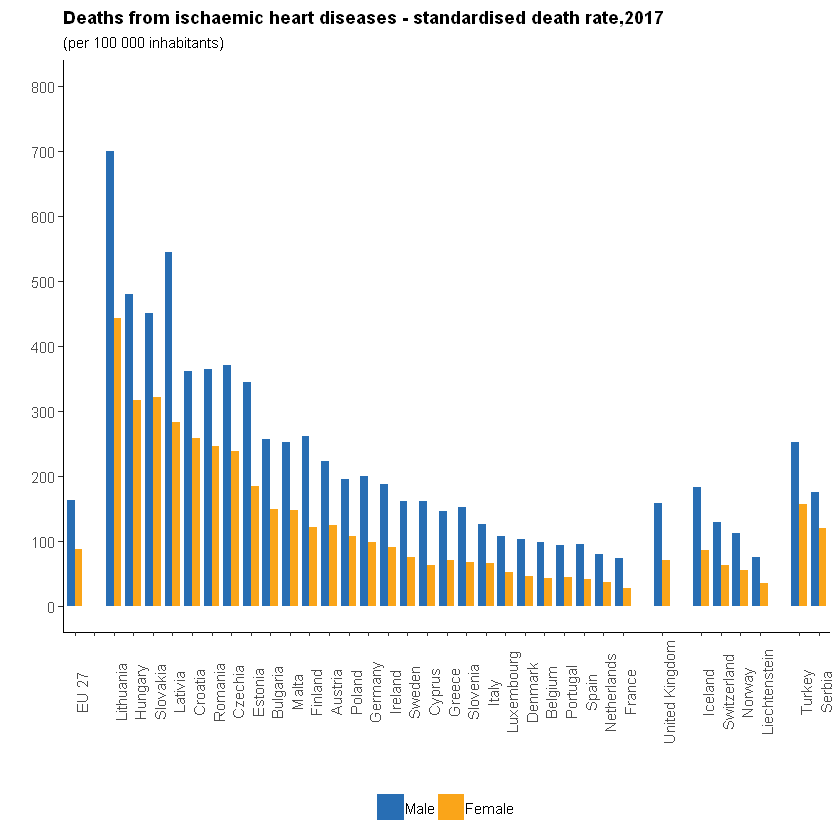

In [38]:
ggplot(data_fig4, aes(x=geo,y=values_n)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge",width=0.8) +
            theme_classic()+
            scale_x_discrete(limits=c("EU27_2020"," ",
                                      "LT", "HU","SK","LV","HR","RO","CZ","EE", "BG", "MT","FI", "AT", "PL", "DE",
                "IE", "SE","CY", "EL","SI","IT","LU","DK", "BE","PT", "ES",  "NL","FR"," ",
                                      "UK"," ",
                                      "IS","CH", "NO","LI"," ",
                                      "TR","RS" ) ,
                             labels=c("EU 27"," ",
                                      "Lithuania","Hungary","Slovakia","Lativia","Croatia","Romania",
                                      "Czechia","Estonia","Bulgaria","Malta","Finland","Austria","Poland","Germany",
                                      "Ireland","Sweden","Cyprus","Greece","Slovenia","Italy","Luxembourg","Denmark",
                                      "Belgium","Portugal","Spain","Netherlands","France"," ",
                                      "United Kingdom", " ",
                                      "Iceland", "Switzerland","Norway","Liechtenstein"," ",
                                      "Turkey","Serbia")) +
            scale_y_continuous(limits = c(0, 800), breaks = seq(0, 800, by = 100))+
        theme(legend.position="bottom",legend.direction="horizontal") +
        scale_fill_manual(labels=c("Male","Female"),values = c("#286eb4","#faa519"), name = " ") +
        ylab(" ")+
        xlab(" ")+
        ggtitle("Deaths from ischaemic heart diseases - standardised death rate,2017",
                subtitle="(per 100 000 inhabitants)")+
        theme(axis.text.x=element_text(angle=90,size=9), plot.title = element_text(size = 11, face = "bold"),
          plot.subtitle = element_text(size=9),legend.title=element_blank())


### Figure 4: Deaths from suicide - standardized death rate, 2017
##### First steps: Apply relevant filters
- keeping variable with causes of death relevant for the graphic (ischaemic heart diseases = I20-I25)
- keeping only observations of countries specified in countries variable at the beginning, age in total
- using the values for year 2017 (for EU27 and France from 2016), creating new values_n variable
- deleting unused variables & levels from dataset (age, unit, time,icd-10, old values variable)
- checking structure/ values of ordered dataset (do they match to the graphic)

In [39]:
data_fig5 <- subset(dataset, (dataset$time==2016 | dataset$time==2017)  & 
                    dataset$geo %in% countries &
                    dataset$icd10=="X60-X84_Y870" &
                   dataset$age=="TOTAL")
data_fig5 <- droplevels(data_fig5)
data_fig5$values_n <- ifelse(data_fig5$time==2017,data_fig5$values,NA)
data_fig5[data_fig5$geo=="FR",]$values_n <- data_fig5[data_fig5$geo=="FR",]$values
data_fig5[data_fig5$geo=="EU27_2020",]$values_n <- data_fig5[data_fig5$geo=="EU27_2020",]$values
data_fig5 <- data_fig5[!is.na(data_fig5$values_n),]
data_fig5 <- data_fig5[,-c(1,3,4,6,7)]
#str(data_fig4)
tail(data_fig5)

sex,geo,values_n
F,EU27_2020,4.66
F,FR,5.86
M,EU27_2020,17.77
M,FR,21.97
T,EU27_2020,10.75
T,FR,13.22


##### Second step: Modify dataset
- changing the order within the dataset to get the ranked structure
- ranking on the combined values of males and females (using total of sex) & releveling of the variable icd10 according to ranks & structure in original data set)
    - EU 27, summarizing category
    - EU member countries
    - additional members of Schengen area
    - candidate countries Serbia and Turkey

In [ ]:
data_fig52 <- subset(data_fig5,data_fig5$geo %in% EU_27 & data_fig5$sex=="T")
data_fig52[order(data_fig52$values_n,decreasing=TRUE),]

In [ ]:
data_fig53 <- subset(data_fig5,(data_fig5$geo == "IS" | 
                                data_fig5$geo == "CH" |
                                data_fig5$geo == "NO" |
                                data_fig5$geo == "LI") 
                     & data_fig5$sex=="T")
data_fig53[order(data_fig43$values_n,decreasing=TRUE),]

In [ ]:
data_fig54 <- subset(data_fig5,(data_fig5$geo == "RS" | 
                                data_fig5$geo == "TR") 
                     & data_fig5$sex=="T")
data_fig54[order(data_fig54$values_n,decreasing=TRUE),]

In [40]:
data_fig5 <- subset(data_fig5,data_fig5$sex !="T")
data_fig5$geo <- factor(data_fig5$geo,levels = c("EU27_2020", #EU 27
                    
            "LT", #Lithuania
            "SI", #Slovenia
            "LV", #Lativia
             "EE", #Estonia
            "HU", #Hungary   
             "BE", #Belgium                                     
            "FI", #Finland
           "HR", #Croatia
            "AT", #Austria
            "FR", #France
            "CZ", #Czechia 
            "SE", #Sweden                                    
            "PL", #Poland
            "NL", #Netherlands
            "DE", #Germany
            "DK", #Denmark
            "RO", #Romania
            "BG", #Bulgaria
            "PT", #Portugal
            "LU", #Luxembourg
            "IE", #Ireland
            "ES", #Spain                                    
             "SK", #Slovakia
             "IT", #Italy                                    
              "MT", #Malta
            "EL", #Greece 
            "CY", #Cyprus                                    
            "UK", #United Kingdom
            "LI", #Liechtenstein                                      
            "CH", #Switzerland
            "NO", #Norway
            "IS", #Iceland                            
             "RS", #Serbia
              "TR" ))#Turkey

###### Third step: Create graphic with ggplot2
- using the package ggplot to create the combined bar plot for males and females
- creating the space with aes (causes of death on x axis and values on y axis)
- creating the bar plot with geom_bar command, grouped by sex (fill=sex) with bar beside bar (position="dodge"), barwidth
- changing the labels of x-axis according to countries
- creating the legend and colors for the bars with scale_fill_manual with sex (colors token from the original with hex code)
- deleting labels of the axes
- creating the title with subtitle
- changing the size of title and subtitle, axis label

In [41]:
data_fig5$sex <- relevel(data_fig5$sex,ref="M")

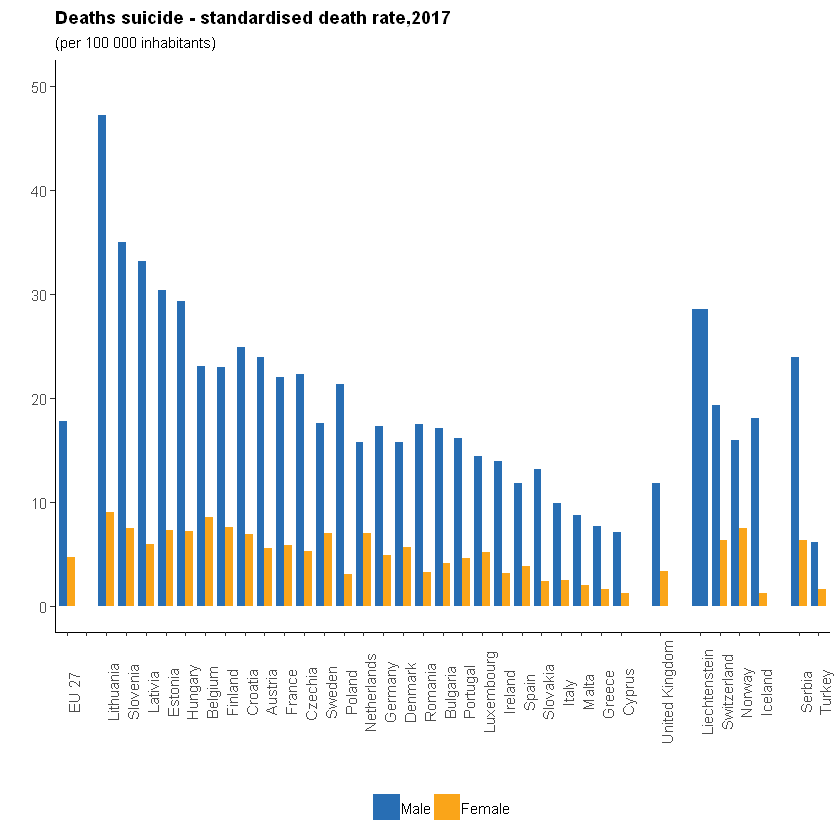

In [42]:
ggplot(data_fig5, aes(x=geo,y=values_n)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge",width=0.8) +
            theme_classic()+
            scale_x_discrete(limits=c("EU27_2020","","LT","SI","LV","EE","HU", "BE","FI", "HR","AT", "FR",  "CZ","SE","PL", 
                                      "NL","DE","DK","RO","BG", "PT", "LU","IE","ES","SK","IT","MT","EL","CY","","UK", "",
                                      "LI", "CH","NO","IS","", "RS", "TR" ),
                             labels=c("EU 27","","Lithuania","Slovenia","Lativia","Estonia",
                                      "Hungary","Belgium","Finland","Croatia","Austria","France",
                                      "Czechia ","Sweden","Poland","Netherlands","Germany","Denmark","Romania",
                                      "Bulgaria","Portugal","Luxembourg","Ireland","Spain","Slovakia","Italy","Malta",
                                      "Greece ","Cyprus","","United Kingdom","","Liechtenstein","Switzerland",
                                      "Norway","Iceland","",
                                      "Serbia","Turkey")) +
            scale_y_continuous(limits = c(0, 50), breaks = seq(0, 50, by = 10))+
        theme(legend.position="bottom",legend.direction="horizontal") +
        scale_fill_manual(labels=c("Male","Female"),values = c("#286eb4","#faa519"), name = " ") +
        ylab(" ")+
        xlab(" ")+
        ggtitle("Deaths suicide - standardised death rate,2017",
                subtitle="(per 100 000 inhabitants)")+
        theme(axis.text.x=element_text(angle=90,size=9), plot.title = element_text(size = 11, face = "bold"),
          plot.subtitle = element_text(size=9),legend.title=element_blank())


### Figure 5: Causes of death - standardized death rate, ages less than 65, 2017
##### First steps: Apply relevant filters
- keeping variable with causes of death relevant for the graphic: (C18-C21 = Cororectal cancer,C_33-C34= Lung cancerC=Cancer, , C_50=Breast Cancer, I=Circulatory diseases, I20_I25=Ischaemic heart disease, V_Y85=Transport Accidents)
- only inhabitants aged less than 65
- EU 27 summarizing category
- 2006-2016: using merged dataset_3 from above with data from 2006-2016

In [54]:
causes_fig6 <- c("C18-C21","C33_C34","C","C50","I","I20-I25","V_Y85")
data_fig6 <- subset(dataset_3, dataset_3$geo =="EU27_2020" &
                   dataset_3$age =="Y_LT65" &
                   dataset_3$icd10 %in% causes_fig6 &
                   dataset_3$sex=="T")
data_fig6 <- droplevels(data_fig6)
head(data_fig6)

unit,sex,age,icd10,geo,time,values
RT,T,Y_LT65,C,EU27_2020,2016,77.33
RT,T,Y_LT65,C18-C21,EU27_2020,2016,7.23
RT,T,Y_LT65,C33_C34,EU27_2020,2016,19.06
RT,T,Y_LT65,C50,EU27_2020,2016,7.08
RT,T,Y_LT65,I,EU27_2020,2016,44.77
RT,T,Y_LT65,I20-I25,EU27_2020,2016,17.91


###### Second step: Standardize such that 2006 = 100
- taking values from year 2006 for each cause (2009 for lung cancer)
- dividing all other respective values with value from 2006/2009 divided by 100

In [55]:
table(data_fig6$icd10[data_fig6$time==2006], data_fig6$values[data_fig6$time==2006])

         
          8.2 8.6 9.5 26.6 61.2 91.9
  C         0   0   0    0    0    1
  C18-C21   1   0   0    0    0    0
  C33_C34   0   0   0    0    0    0
  C50       0   1   0    0    0    0
  I         0   0   0    0    1    0
  I20-I25   0   0   0    1    0    0
  V_Y85     0   0   1    0    0    0

In [51]:
table(data_fig6$icd10[data_fig6$time==2009], data_fig6$values[data_fig6$time==2009])

         
          7.7 7.8 7.9 22 55.5 88.1
  C         0   0   0  0    0    1
  C18-C21   0   1   0  0    0    0
  C33_C34   0   0   0  1    0    0
  C50       0   0   1  0    0    0
  I         0   0   0  0    1    0
  V_Y85     1   0   0  0    0    0

In [56]:
data_fig6$values[data_fig6$icd10=="C"] <- data_fig6$values[data_fig6$icd10=="C"] /0.919
data_fig6$values[data_fig6$icd10=="C18-C21"] <- data_fig6$values[data_fig6$icd10=="C18-C21"] /0.082
data_fig6$values[data_fig6$icd10=="C33_C34"] <- data_fig6$values[data_fig6$icd10=="C33_C34"] /0.220
data_fig6$values[data_fig6$icd10=="C50"] <- data_fig6$values[data_fig6$icd10=="C50"] /0.086
data_fig6$values[data_fig6$icd10=="I"] <- data_fig6$values[data_fig6$icd10=="I"]/0.612
data_fig6$values[data_fig6$icd10=="I20-I25"] <- data_fig6$values[data_fig6$icd10=="I20-I25"]/0.266
data_fig6$values[data_fig6$icd10=="V_Y85"] <- data_fig6$values[data_fig6$icd10=="V_Y85"]/0.095

###### Third step: Create graphic with ggplot2
- using the package ggplot to create the line plot for different diseases
- creating the space with aes (years on x axis and values on y axis), grouped by causes of deaths
- creating the plot with geom_line command, colors according to causes of deaths
- adding a horizontal line for values/ death rate = 100
- adding a title
- changing the labels & limits of x-axis & y-axis according to countries
- creating the legend and colors for the bars with scale_fill_manual with sex (colors token from the original with hex code)
- deleting labels of the axes
- changing the size of title and subtitle, axis label

Warning message:
"Removed 24 rows containing missing values (geom_path)."

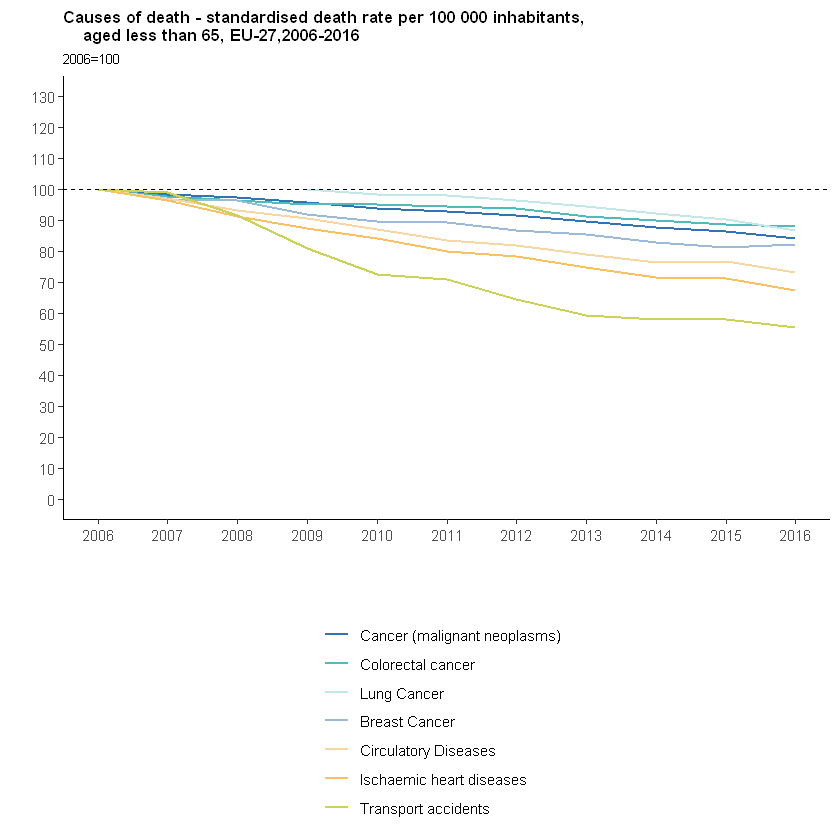

In [60]:
figure1 <- ggplot(data_fig6, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10),lwd=0.7) + 
    geom_hline(yintercept=100,lty=2) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants,
    aged less than 65, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)","Colorectal cancer", "Lung Cancer",
                                  "Breast Cancer","Circulatory Diseases","Ischaemic heart diseases","Transport accidents"), 
            values = c("#3074b7","#50bbbb","#c1e7e7","#9bbad8","#f7d7a1","#fbc160","#cbd258"),name = " ") +
    ylab(" ")+
    xlab(" ")

figure1 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)